In [ ]:
#%pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 660.6 kB/s eta 0:03:47
   ---------------------------------------- 0.1/150.0 MB 656.4 kB/s eta 0:03:49
   ---------------------------------------- 0.1/150.0 MB 901.1 kB/s eta 0:02:47
   ---------------------------------------- 0.2/150.0 MB 1.1 MB/s eta 0:02:12
   ---------------------------------------- 0.3/150.0 MB 1.2 MB/s eta 0:02:07
   ---------------------------------------- 0.4/150.0 MB 1.4 MB/s eta 0:01:51
   ---------------------------------------- 0.5/150.0 MB 1.4 MB/s eta 0:01:44
   ---------------------------------------- 0.6/150.0 MB 1.6 MB/s eta 0:01:36
   ---------------------------------------- 0.7/150.0 MB 1.7 MB/s eta 0:01:30
   ---------------------------------------- 0.7/150.0 MB 1.6 MB/s eta 0:01:32
   ---------------------------------------- 0.7/150.0 MB 1.6 MB/s eta 0:01:32
   ---------------------------------------- 0.7/150.0 MB 1.6 MB/s

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
import xgboost as xgb

In [5]:
# Load the processed dataset
df = pd.read_csv('processed_data.csv')

In [6]:
# Define features and target variable
X = df.drop(columns=['heart_attack'])  # Features
y = df['heart_attack']  # Target

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Train XGBoost model WITHOUT GridSearchCV
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

c:\Users\hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:36:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [9]:
# Evaluate the model (without tuning)
print("XGBoost (Without GridSearchCV) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")

XGBoost (Without GridSearchCV) Evaluation:
Accuracy: 0.7293
Precision: 0.6820
Recall: 0.6043
F1 Score: 0.6408


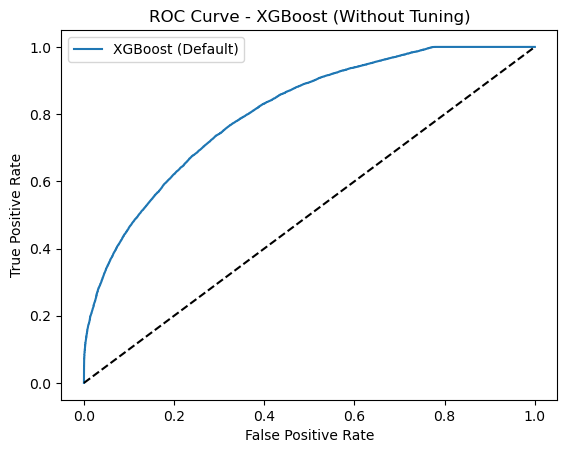

In [10]:
# Plot ROC curve for model without GridSearchCV
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='XGBoost (Default)')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (Without Tuning)')
plt.legend()
plt.show()

In [11]:
# Train XGBoost model WITH GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters found
print("\nBest Parameters from GridSearchCV:", grid_search.best_params_)

c:\Users\hp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:37:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Parameters from GridSearchCV: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


In [12]:
# Use the best estimator
best_xgb = grid_search.best_estimator_

In [13]:
# Evaluate the tuned model
y_pred_best_xgb = best_xgb.predict(X_test)

print("\nXGBoost (With GridSearchCV) Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_xgb):.4f}")


XGBoost (With GridSearchCV) Evaluation:
Accuracy: 0.7344
Precision: 0.6897
Recall: 0.6096
F1 Score: 0.6471


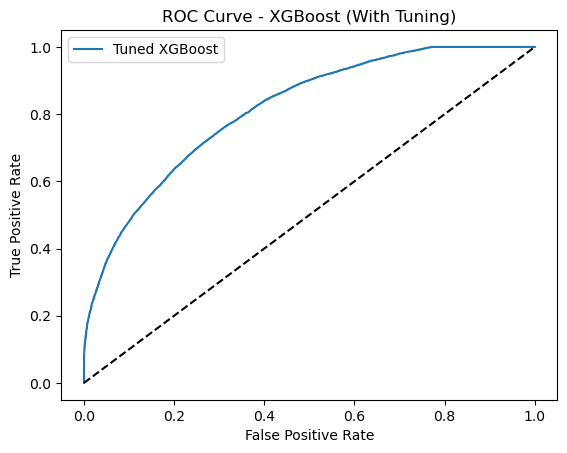

In [14]:
# Plot ROC curve for tuned model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, best_xgb.predict_proba(X_test)[:, 1])
plt.plot(fpr_best, tpr_best, label='Tuned XGBoost')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (With Tuning)')
plt.legend()
plt.show()